<a href="https://colab.research.google.com/github/iam7mza/EventClassification/blob/main/Event_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/iam7mza/EventClassification.git"
!mv EventClassification/* ./
!rm -rf EventClassification
!rm -rf sample_data

Cloning into 'EventClassification'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 295 (delta 50), reused 253 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (295/295), 29.63 MiB | 6.63 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (105/105), done.


In [2]:
#importing data
#importing data lol
#haha
import loader
import numpy as np
import pandas as pd

filepath = "csv_output"
df = loader.load(filepath)
loader.clean(df); #to clean the data

Streaming output truncated to the last 5000 lines.

Target extraction complete:
Unique particle types: ['C1N2' 'GG' 'VV' 'W' 'Z' 'ZPrime' 'Zprime2000' 'Zprime750' 'singletop'
 'ttbar']
Number of classes: 10

Particle type distribution:
event_type
Z             32000
W             24000
Unknown       12000
VV             7000
singletop      6000
GG             4000
C1N2           3000
Zprime750      1000
ttbar          1000
Zprime2000     1000
ZPrime         1000
Name: count, dtype: int64
Cleaned 56 list columns in DataFrame


In [3]:
df = df[df['numeric_target'] != -1]  #dropping all the unknown events
df

,event,runNumber,eventNumber,channelNumber,mcWeight,XSection,SumWeights,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,...,lep_pt_syst,met_et_syst,jet_pt_syst,photon_pt_syst,largeRjet_pt_syst,tau_pt_syst,full_event_name,onehot_target,numeric_target,event_type
0,25,284500,335396,364193,1.0,38.340100,4322850.0,1.264590,0.96966,1.000000,...,"[2472.14, 0]",8890.50,"[10000.2, 0]","[0, 0]","[23285.7, 0]","[0, 0]",Wtaunu_PTV280_500_CVetoBVeto,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,W
1,50,284500,339634,364193,1.0,38.340100,4322850.0,1.262050,0.95254,1.000000,...,"[830.3, 0]",1265.88,"[4763.42, 0]","[0, 0]","[1115.22, 0]","[0, 0]",Wtaunu_PTV280_500_CVetoBVeto,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,W
2,166,284500,336628,364193,1.0,38.340100,4322850.0,1.320950,1.00000,0.997463,...,"[166.261, 0]",4039.94,"[3937.6, 5746.28]","[0, 0]","[16835.2, 0]","[0, 0]",Wtaunu_PTV280_500_CVetoBVeto,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,W
3,241,284500,349677,364193,1.0,38.340100,4322850.0,1.087350,0.97994,1.000000,...,"[1795.16, 0]",8395.69,"[8449.12, 1871.85]","[0, 0]","[5011.81, 0]","[0, 0]",Wtaunu_PTV280_500_CVetoBVeto,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,W
4,418,284500,353075,364193,1.0,38.340100,4322850.0,1.241680,1.00000,0.991307,...,"[2385.12, 0]",4028.69,"[5307.68, 0]","[0, 0]","[17370.1, 0]","[0, 0]",Wtaunu_PTV280_500_CVetoBVeto,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,35600,284500,5393,370114,1.0,0.057037,101591.0,1.196100,0.97949,1.000000,...,"[534.581, 0]",2133.75,"[14329.2, 25227.3, 1676.79, 3202.14, 1217.11]","[0, 0]","[45588.7, 8176.5]","[0, 0]",GG_ttn1_1200_5000_1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,GG
91996,35647,284500,6797,370114,1.0,0.057037,101591.0,1.214120,0.96727,1.000000,...,"[473.298, 0]",24352.10,"[10894.6, 3935.47, 2178.6, 5099.82, 1526.5, 50...","[0, 0]","[3992.56, 9987.22]","[0, 0]",GG_ttn1_1200_5000_1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,GG
91997,35712,284500,6755,370114,1.0,0.057037,101591.0,1.320950,0.96787,0.993397,...,"[11088.6, 212.002]",7776.38,"[12608, 5483.39, 14044.5, 1641.62, 3876.78, 20...","[0, 0]","[27240.5, 21025.2]","[0, 0]",GG_ttn1_1200_5000_1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,GG
91998,35736,284500,8981,370114,1.0,0.057037,101591.0,1.241680,1.00000,0.993990,...,"[295.093, 0]",36858.50,"[3724.51, 5681.75, 8069.15, 2072.54, 8888.22, ...","[0, 0]","[1960, 5876.66]","[0, 0]",GG_ttn1_1200_5000_1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,GG


In [4]:
# Check unique event types and their corresponding targets
event_target_mapping = df[['event_type', 'numeric_target']].drop_duplicates().sort_values('numeric_target')
print("Event type to target mapping:")
print(event_target_mapping)


Event type to target mapping:
       event_type  numeric_target
56000        C1N2               0
12000          GG               1
14000          VV               2
0               W               3
3000            Z               4
76000      ZPrime               5
17000  Zprime2000               6
2000    Zprime750               7
35000   singletop               8
13000       ttbar               9


In [5]:
df.columns

Index(['event', 'runNumber', 'eventNumber', 'channelNumber', 'mcWeight',
       'XSection', 'SumWeights', 'scaleFactor_PILEUP', 'scaleFactor_ELE',
       'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU',
       'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER',
       'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n',
       'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav',
       'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched',
       'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'larg

In [6]:
# the chosen ones
TheChosenOnes = ['XSection', 'trigE', 'trigM', 'trigP', 'lep_n','lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt','jet_MV2c10', 'photon_n','photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'largeRjet_phi', 'largeRjet_E', 'largeRjet_m','largeRjet_D2', 'largeRjet_tau32', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst',
       'met_et_syst', 'jet_pt_syst', 'photon_pt_syst', 'largeRjet_pt_syst',
       'tau_pt_syst']


df[TheChosenOnes]

,XSection,trigE,trigM,trigP,lep_n,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,...,tau_isTightID,tau_nTracks,tau_BDTid,ditau_m,lep_pt_syst,met_et_syst,jet_pt_syst,photon_pt_syst,largeRjet_pt_syst,tau_pt_syst
0,38.340100,1,0,0,1,"[222443, 0]","[-2.10613, 0]","[3.1198, 0]","[927376, 0]","[0.233017, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[2472.14, 0]",8890.50,"[10000.2, 0]","[0, 0]","[23285.7, 0]","[0, 0]"
1,38.340100,1,0,0,1,"[40193.3, 0]","[1.85152, 0]","[0.730999, 0]","[131161, 0]","[-0.0314713, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[830.3, 0]",1265.88,"[4763.42, 0]","[0, 0]","[1115.22, 0]","[0, 0]"
2,38.340100,0,1,0,1,"[40949.5, 0]","[0.75648, 0]","[-2.92569, 0]","[53236, 0]","[-0.0324345, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[166.261, 0]",4039.94,"[3937.6, 5746.28]","[0, 0]","[16835.2, 0]","[0, 0]"
3,38.340100,1,0,0,1,"[224846, 0]","[0.316552, 0]","[-1.15219, 0]","[236205, 0]","[-0.0148354, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[1795.16, 0]",8395.69,"[8449.12, 1871.85]","[0, 0]","[5011.81, 0]","[0, 0]"
4,38.340100,0,1,0,1,"[115869, 0]","[-1.7534, 0]","[0.819621, 0]","[344559, 0]","[-0.0530529, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[2385.12, 0]",4028.69,"[5307.68, 0]","[0, 0]","[17370.1, 0]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0.057037,1,0,0,1,"[77810.1, 0]","[1.07474, 0]","[-0.215539, 0]","[127244, 0]","[-0.00945282, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[534.581, 0]",2133.75,"[14329.2, 25227.3, 1676.79, 3202.14, 1217.11]","[0, 0]","[45588.7, 8176.5]","[0, 0]"
91996,0.057037,1,0,0,1,"[53143.2, 0]","[-1.96862, 0]","[-0.409305, 0]","[193984, 0]","[0.0271988, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[473.298, 0]",24352.10,"[10894.6, 3935.47, 2178.6, 5099.82, 1526.5, 50...","[0, 0]","[3992.56, 9987.22]","[0, 0]"
91997,0.057037,1,1,0,2,"[160787, 85037.7]","[-0.363561, -0.0107525]","[-2.25312, 1.57187]","[171531, 85042.7]","[0.0227642, -0.0770531]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[11088.6, 212.002]",7776.38,"[12608, 5483.39, 14044.5, 1641.62, 3876.78, 20...","[0, 0]","[27240.5, 21025.2]","[0, 0]"
91998,0.057037,0,1,0,1,"[45688.1, 0]","[-0.255662, 0]","[-0.249791, 0]","[47189.5, 0]","[-0.0796385, 0]",...,"[0, 0]","[0, 0]","[0, 0]",0,"[295.093, 0]",36858.50,"[3724.51, 5681.75, 8069.15, 2072.54, 8888.22, ...","[0, 0]","[1960, 5876.66]","[0, 0]"


In [7]:
#extracting the features for lists (only first two elements)
# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col][0], list):
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")

# Extract all list features at once
extracted_data = {}

# Add scalar columns
for col in scalar_cols:
    extracted_data[col] = df[col]

# Add list-derived columns
for col in list_cols:
    extracted_data[f'{col}_first'] = df[col].apply(lambda x: x[0] if len(x) > 0 else 0)
    extracted_data[f'{col}_second'] = df[col].apply(lambda x: x[1] if len(x) > 1 else 0)


# Create final dataframe in one go
df_extracted = pd.DataFrame(extracted_data)

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 13
Final shape: (80000, 105)


,XSection,trigE,trigM,trigP,lep_n,met_et,met_phi,jet_n,photon_n,largeRjet_n,...,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,photon_pt_syst_first,photon_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second,tau_pt_syst_first,tau_pt_syst_second
0,38.340100,1,0,0,1,75062.1,2.892900,1,0,1,...,2472.140,0.000,10000.20,0.00,0,0,23285.70,0.00,0,0
1,38.340100,1,0,0,1,298187.0,1.427940,1,0,1,...,830.300,0.000,4763.42,0.00,0,0,1115.22,0.00,0,0
2,38.340100,0,1,0,1,158627.0,-3.069460,2,0,1,...,166.261,0.000,3937.60,5746.28,0,0,16835.20,0.00,0,0
3,38.340100,1,0,0,1,134639.0,-0.981040,2,0,1,...,1795.160,0.000,8449.12,1871.85,0,0,5011.81,0.00,0,0
4,38.340100,0,1,0,1,218682.0,0.637381,1,0,1,...,2385.120,0.000,5307.68,0.00,0,0,17370.10,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0.057037,1,0,0,1,184018.0,-2.452670,5,0,2,...,534.581,0.000,14329.20,25227.30,0,0,45588.70,8176.50,0,0
91996,0.057037,1,0,0,1,458396.0,-2.549440,9,0,2,...,473.298,0.000,10894.60,3935.47,0,0,3992.56,9987.22,0,0
91997,0.057037,1,1,0,2,385499.0,2.215400,9,0,2,...,11088.600,212.002,12608.00,5483.39,0,0,27240.50,21025.20,0,0
91998,0.057037,0,1,0,1,856639.0,1.157230,14,0,2,...,295.093,0.000,3724.51,5681.75,0,0,1960.00,5876.66,0,0


In [8]:
#dropping columns that are all zeros
for col in df_extracted.columns:
    if np.sum(df_extracted[col]) == 0:
        print(f"Column {col} is all zeros, dropping it.")
        df_extracted.drop(columns=[col], inplace=True)


df_extracted

Column trigP is all zeros, dropping it.
Column photon_n is all zeros, dropping it.
Column tau_n is all zeros, dropping it.
Column ditau_m is all zeros, dropping it.
Column photon_pt_first is all zeros, dropping it.
Column photon_pt_second is all zeros, dropping it.
Column photon_eta_first is all zeros, dropping it.
Column photon_eta_second is all zeros, dropping it.
Column photon_phi_first is all zeros, dropping it.
Column photon_phi_second is all zeros, dropping it.
Column photon_E_first is all zeros, dropping it.
Column photon_E_second is all zeros, dropping it.
Column photon_isTightID_first is all zeros, dropping it.
Column photon_isTightID_second is all zeros, dropping it.
Column photon_ptcone30_first is all zeros, dropping it.
Column photon_ptcone30_second is all zeros, dropping it.
Column photon_etcone20_first is all zeros, dropping it.
Column photon_etcone20_second is all zeros, dropping it.
Column photon_convType_first is all zeros, dropping it.
Column photon_convType_second is

,XSection,trigE,trigM,lep_n,met_et,met_phi,jet_n,largeRjet_n,met_et_syst,lep_pt_first,...,largeRjet_D2_first,largeRjet_D2_second,largeRjet_tau32_first,largeRjet_tau32_second,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second
0,38.340100,1,0,1,75062.1,2.892900,1,1,8890.50,222443.0,...,1.906670,0.000000,0.803778,0.000000,2472.140,0.000,10000.20,0.00,23285.70,0.00
1,38.340100,1,0,1,298187.0,1.427940,1,1,1265.88,40193.3,...,1.594770,0.000000,0.448648,0.000000,830.300,0.000,4763.42,0.00,1115.22,0.00
2,38.340100,0,1,1,158627.0,-3.069460,2,1,4039.94,40949.5,...,1.281290,0.000000,0.705174,0.000000,166.261,0.000,3937.60,5746.28,16835.20,0.00
3,38.340100,1,0,1,134639.0,-0.981040,2,1,8395.69,224846.0,...,2.910560,0.000000,0.319095,0.000000,1795.160,0.000,8449.12,1871.85,5011.81,0.00
4,38.340100,0,1,1,218682.0,0.637381,1,1,4028.69,115869.0,...,1.497090,0.000000,0.761008,0.000000,2385.120,0.000,5307.68,0.00,17370.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0.057037,1,0,1,184018.0,-2.452670,5,2,2133.75,77810.1,...,1.341670,0.944002,0.594892,0.036005,534.581,0.000,14329.20,25227.30,45588.70,8176.50
91996,0.057037,1,0,1,458396.0,-2.549440,9,2,24352.10,53143.2,...,0.782390,2.346500,0.617202,0.453010,473.298,0.000,10894.60,3935.47,3992.56,9987.22
91997,0.057037,1,1,2,385499.0,2.215400,9,2,7776.38,160787.0,...,1.056660,1.174820,0.374893,0.311138,11088.600,212.002,12608.00,5483.39,27240.50,21025.20
91998,0.057037,0,1,1,856639.0,1.157230,14,2,36858.50,45688.1,...,0.879853,0.543852,0.308015,0.661404,295.093,0.000,3724.51,5681.75,1960.00,5876.66


TODO: MCWEIGHT, DROPOUT AND DONT FORGET TO HAVE FUN

In [9]:
df['onehot_target']

,onehot_target
0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
91995,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
91996,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
91997,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
91998,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [10]:
# Even more efficient - process all at once
import pandas as pd
import numpy as np

# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col][0], list):
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")

# Extract all list features at once
extracted_data = {}

# Add scalar columns
for col in scalar_cols:
    extracted_data[col] = df[col]

# Add list-derived columns
for col in list_cols:
    extracted_data[f'{col}_first'] = df[col].apply(lambda x: x[0] if len(x) > 0 else 0)
    extracted_data[f'{col}_second'] = df[col].apply(lambda x: x[1] if len(x) > 1 else 0)

# Create final dataframe in one go
df_extracted = pd.DataFrame(extracted_data)

columns_to_drop = []
for col in df_extracted.columns:
    if np.sum(df_extracted[col]) == 0:  # Check if all values are zero
        columns_to_drop.append(col)
        print(f"Column {col} is all zeros, will drop it.")

# Drop all zero columns at once
df_extracted = df_extracted.drop(columns=columns_to_drop)

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 13
Column trigP is all zeros, will drop it.
Column photon_n is all zeros, will drop it.
Column tau_n is all zeros, will drop it.
Column ditau_m is all zeros, will drop it.
Column photon_pt_first is all zeros, will drop it.
Column photon_pt_second is all zeros, will drop it.
Column photon_eta_first is all zeros, will drop it.
Column photon_eta_second is all zeros, will drop it.
Column photon_phi_first is all zeros, will drop it.
Column photon_phi_second is all zeros, will drop it.
Column photon_E_first is all zeros, will drop it.
Column photon_E_second is all zeros, will drop it.
Column photon_isTightID_first is all zeros, will drop it.
Column photon_isTightID_second is all zeros, will drop it.
Column photon_ptcone30_first is all zeros, will drop it.
Column photon_ptcone30_second is all zeros, will drop it.
Column photon_etcone20_first is all zeros, will drop it.
Column photon_etcone20_second is all zeros, will drop it.
Column photon_convType_first is al

,XSection,trigE,trigM,lep_n,met_et,met_phi,jet_n,largeRjet_n,met_et_syst,lep_pt_first,...,largeRjet_D2_first,largeRjet_D2_second,largeRjet_tau32_first,largeRjet_tau32_second,lep_pt_syst_first,lep_pt_syst_second,jet_pt_syst_first,jet_pt_syst_second,largeRjet_pt_syst_first,largeRjet_pt_syst_second
0,38.340100,1,0,1,75062.1,2.892900,1,1,8890.50,222443.0,...,1.906670,0.000000,0.803778,0.000000,2472.140,0.000,10000.20,0.00,23285.70,0.00
1,38.340100,1,0,1,298187.0,1.427940,1,1,1265.88,40193.3,...,1.594770,0.000000,0.448648,0.000000,830.300,0.000,4763.42,0.00,1115.22,0.00
2,38.340100,0,1,1,158627.0,-3.069460,2,1,4039.94,40949.5,...,1.281290,0.000000,0.705174,0.000000,166.261,0.000,3937.60,5746.28,16835.20,0.00
3,38.340100,1,0,1,134639.0,-0.981040,2,1,8395.69,224846.0,...,2.910560,0.000000,0.319095,0.000000,1795.160,0.000,8449.12,1871.85,5011.81,0.00
4,38.340100,0,1,1,218682.0,0.637381,1,1,4028.69,115869.0,...,1.497090,0.000000,0.761008,0.000000,2385.120,0.000,5307.68,0.00,17370.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0.057037,1,0,1,184018.0,-2.452670,5,2,2133.75,77810.1,...,1.341670,0.944002,0.594892,0.036005,534.581,0.000,14329.20,25227.30,45588.70,8176.50
91996,0.057037,1,0,1,458396.0,-2.549440,9,2,24352.10,53143.2,...,0.782390,2.346500,0.617202,0.453010,473.298,0.000,10894.60,3935.47,3992.56,9987.22
91997,0.057037,1,1,2,385499.0,2.215400,9,2,7776.38,160787.0,...,1.056660,1.174820,0.374893,0.311138,11088.600,212.002,12608.00,5483.39,27240.50,21025.20
91998,0.057037,0,1,1,856639.0,1.157230,14,2,36858.50,45688.1,...,0.879853,0.543852,0.308015,0.661404,295.093,0.000,3724.51,5681.75,1960.00,5876.66


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Split FIRST - Use numeric targets for stratification
X = df_extracted  # Your features
y_numeric = df['numeric_target']  # Use numeric targets for stratification
y_onehot = df['onehot_target']  # Keep one-hot for training

X_train, X_test, y_train_numeric, y_test_numeric, y_train_onehot, y_test_onehot = train_test_split(
    X, y_numeric, y_onehot, test_size=0.3, random_state=123, stratify=y_numeric
)

# 2. Scale AFTER splitting
scaler = StandardScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using training statistics
X_test_scaled = scaler.transform(X_test)


y_train, y_test = y_train_onehot, y_test_onehot  # Use one-hot targets for training
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Target distribution: {np.bincount(y_train_numeric)}")

Training data shape: (56000, 65)
Test data shape: (24000, 65)
Target distribution: [ 2100  2800  4900 16800 22400   700   700   700  4200   700]


In [14]:
# 3. Train your neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Fix: Use numeric targets for sparse_categorical_crossentropy
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Use Input layer instead of input_shape
    Dense(125, activation='relu'),
    Dense(len(np.unique(y_train_numeric)), activation='softmax')  # Use y_train_numeric
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 125)            │         8,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,510 (37.15 KB)

 Trainable params: 9,510 (37.15 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def convert_onehot_to_array(onehot_series):
    """Convert pandas series of one-hot vectors to numpy array"""
    return np.array([np.array(x) for x in onehot_series])


y_train_onehot_fixed = convert_onehot_to_array(y_train_onehot)
y_test_onehot_fixed = convert_onehot_to_array(y_test_onehot)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_onehot_fixed,
                   validation_data=(X_test_scaled, y_test_onehot_fixed),
                   epochs=10, #increase later
                   batch_size=32,
                   verbose=1)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6809 - loss: 0.8519 - val_accuracy: 0.6816 - val_loss: 0.8369
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6906 - loss: 0.8188 - val_accuracy: 0.6850 - val_loss: 0.8285
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6954 - loss: 0.8043 - val_accuracy: 0.6890 - val_loss: 0.8228
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6996 - loss: 0.7920 - val_accuracy: 0.6885 - val_loss: 0.8179
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7004 - loss: 0.7828 - val_accuracy: 0.6888 - val_loss: 0.8163
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7065 - loss: 0.7693 - val_accuracy: 0.6907 - val_loss: 0.8136
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7123 - loss: 0.7544 - val_accuracy: 0.6955 - val_loss: 0.7963
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7175 - loss: 0.7385

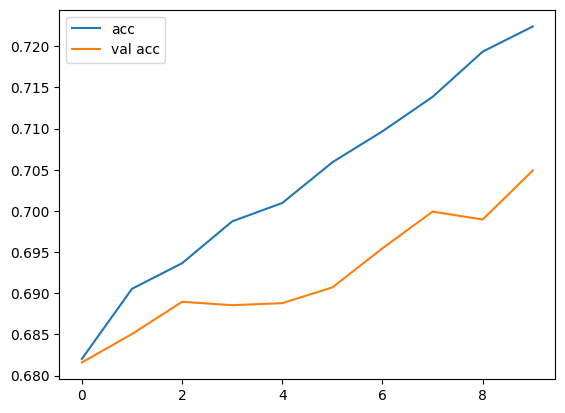

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

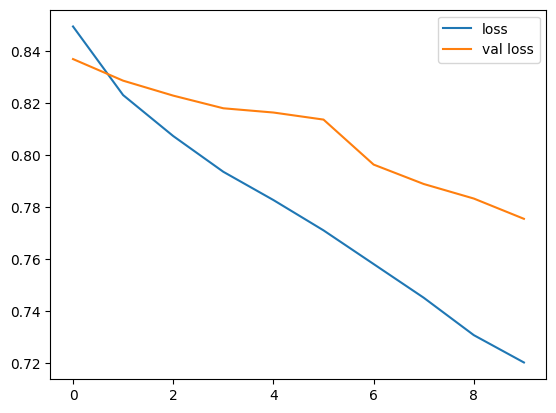

In [18]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


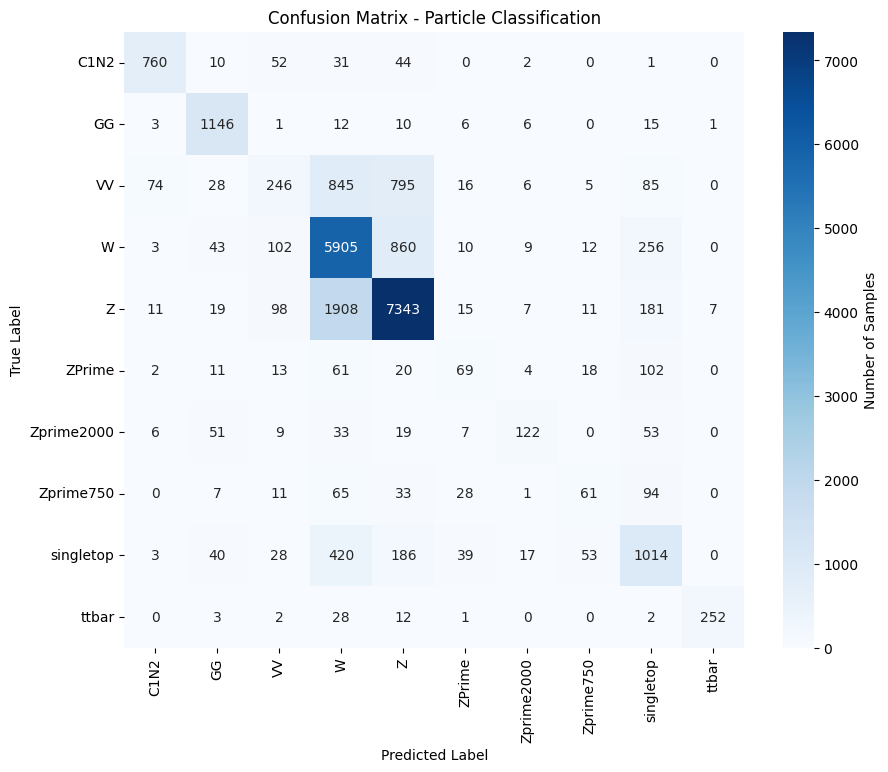

Classification Report:
              precision    recall  f1-score   support

        C1N2       0.88      0.84      0.86       900
          GG       0.84      0.95      0.90      1200
          VV       0.44      0.12      0.18      2100
           W       0.63      0.82      0.72      7200
           Z       0.79      0.76      0.78      9600
      ZPrime       0.36      0.23      0.28       300
  Zprime2000       0.70      0.41      0.51       300
   Zprime750       0.38      0.20      0.27       300
   singletop       0.56      0.56      0.56      1800
       ttbar       0.97      0.84      0.90       300

    accuracy                           0.70     24000
   macro avg       0.66      0.57      0.60     24000
weighted avg       0.69      0.70      0.69     24000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions (probabilities)
y_pred_proba = model.predict(X_test_scaled)

# Convert predictions to class labels (argmax)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Convert one-hot test targets to class labels
y_test_classes = np.argmax(y_test_onehot_fixed, axis=1)

# Create confusion matrix with class labels
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Get particle names
particle_names = np.unique(df.event_type)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=particle_names))

[0]	validation_0-mlogloss:2.05085	validation_1-mlogloss:2.05327
[1]	validation_0-mlogloss:1.76460	validation_1-mlogloss:1.76680
[2]	validation_0-mlogloss:1.57302	validation_1-mlogloss:1.57581
[3]	validation_0-mlogloss:1.38212	validation_1-mlogloss:1.38484
[4]	validation_0-mlogloss:1.22471	validation_1-mlogloss:1.22828
[5]	validation_0-mlogloss:1.09908	validation_1-mlogloss:1.10281
[6]	validation_0-mlogloss:0.98969	validation_1-mlogloss:0.99330
[7]	validation_0-mlogloss:0.91512	validation_1-mlogloss:0.91914
[8]	validation_0-mlogloss:0.82573	validation_1-mlogloss:0.82983
[9]	validation_0-mlogloss:0.74878	validation_1-mlogloss:0.75286
[10]	validation_0-mlogloss:0.69093	validation_1-mlogloss:0.69535
[11]	validation_0-mlogloss:0.63597	validation_1-mlogloss:0.64056
[12]	validation_0-mlogloss:0.58602	validation_1-mlogloss:0.59066
[13]	validation_0-mlogloss:0.54296	validation_1-mlogloss:0.54758
[14]	validation_0-mlogloss:0.49552	validation_1-mlogloss:0.49979
[15]	validation_0-mlogloss:0.45768	

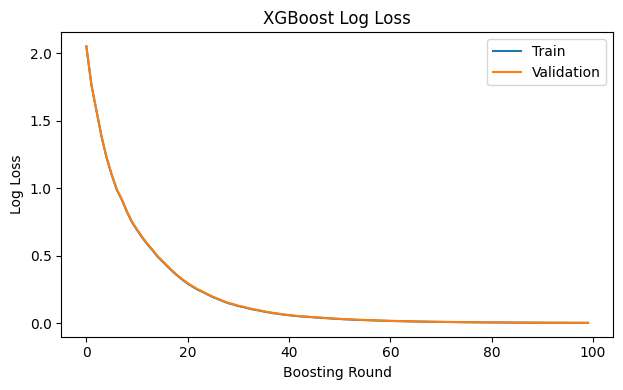

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    n_estimators=100,           # Number of boosting rounds (like epochs)
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Learning rate (like optimizer step size)
    subsample=0.8,             # Fraction of samples used for training each tree
    colsample_bytree=0.8,      # Fraction of features used for each tree
    random_state=123,          # For reproducibility
    eval_metric='mlogloss',    # Multi-class log loss
    early_stopping_rounds=10,   # Stop if no improvement for 10 rounds
    verbosity=1
)

# Train the model (corrected parameters)
model.fit(
    X_train_scaled, y_train_numeric,
    eval_set=[(X_train_scaled, y_train_numeric), (X_test_scaled, y_test_numeric)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_numeric, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test_numeric, y_pred))

# Plot training history
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
plt.ylabel('Log Loss')
plt.xlabel('Boosting Round')
plt.title('XGBoost Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

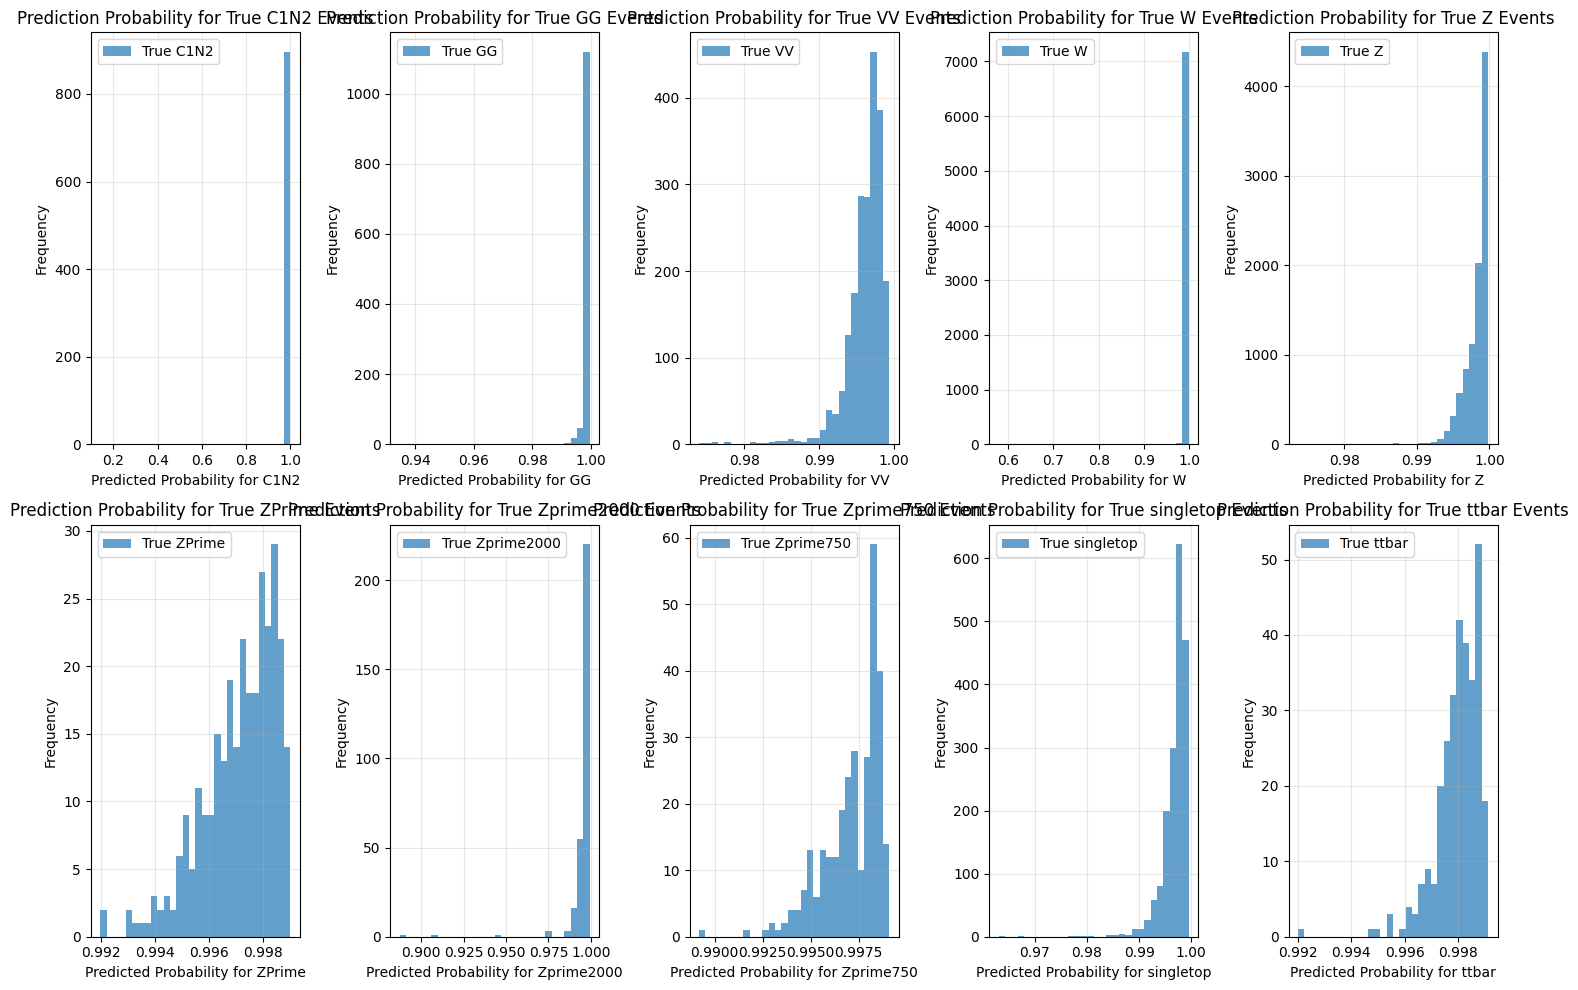

In [22]:

# Get predictions
y_pred_proba = model.predict_proba(X_test_scaled)

# Create a DataFrame for easier handling
pred_df = pd.DataFrame({
    'true_label': y_test_numeric,
    'predicted_class': np.argmax(y_pred_proba, axis=1)
})

# Add probability columns for each class
for i in range(y_pred_proba.shape[1]):
    pred_df[f'prob_class_{i}'] = y_pred_proba[:, i]

# Get unique particle types (assuming you have this mapping)
particle_names = np.unique(df.event_type)

# Plot probability histograms for each true event type
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for true_class in range(len(particle_names)):
    # Get data for this true class
    mask = pred_df['true_label'] == true_class
    class_data = pred_df[mask]

    if len(class_data) == 0:
        continue

    ax = axes[true_class]

    # Plot histogram of predicted probabilities for the correct class
    correct_probs = class_data[f'prob_class_{true_class}']
    ax.hist(correct_probs, bins=30, alpha=0.7, label=f'True {particle_names[true_class]}')

    ax.set_xlabel(f'Predicted Probability for {particle_names[true_class]}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Prediction Probability for True {particle_names[true_class]} Events')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

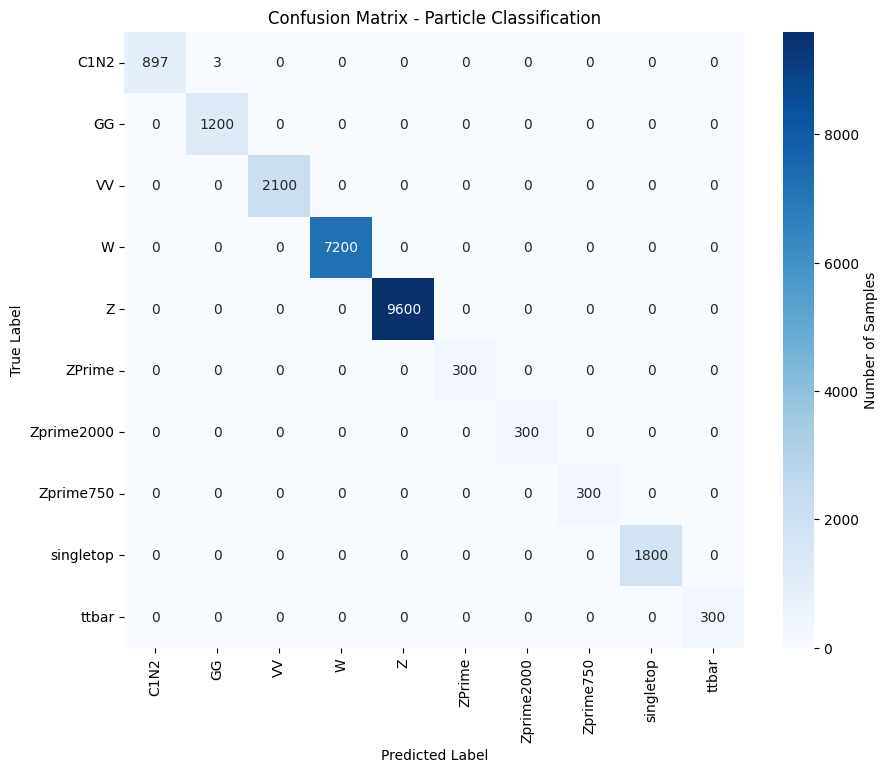

Classification Report:
              precision    recall  f1-score   support

        C1N2       1.00      1.00      1.00       900
          GG       1.00      1.00      1.00      1200
          VV       1.00      1.00      1.00      2100
           W       1.00      1.00      1.00      7200
           Z       1.00      1.00      1.00      9600
      ZPrime       1.00      1.00      1.00       300
  Zprime2000       1.00      1.00      1.00       300
   Zprime750       1.00      1.00      1.00       300
   singletop       1.00      1.00      1.00      1800
       ttbar       1.00      1.00      1.00       300

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions
y_pred = model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_numeric, y_pred, target_names=particle_names))